<a href="https://colab.research.google.com/github/Azimoj/CNN/blob/main/Copy_of_Correction_Dojo_Password.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem summary


What is the password hidden in this dataset? (Hint: It makes me hungry)

*Some starter code:*

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import cv2
from google.colab.patches import cv2_imshow

import plotly.express as px

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/hyperc54/data-puzzles-assets/master/ml/1/dataset.csv')

In [2]:
df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_binary
0,train-5856,4.6898,45.0,5.039216,1.013725,1256.0,2.462745,34.18,-118.33,0
1,train-2899,1.9125,35.0,2.926829,0.853659,477.0,11.634146,35.37,-119.01,0
2,train-6102,4.5221,36.0,5.267974,0.960784,446.0,2.915033,34.11,-117.89,0
3,train-8403,2.3675,29.0,2.900128,1.040973,3425.0,4.385403,33.94,-118.37,0
4,train-1665,5.7001,16.0,6.778195,1.003759,946.0,3.556391,38.02,-122.25,0


In [3]:
df.tail()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_binary
40675,image-[113:105],10.4399,23.0,8.310671,1.023236,3585.0,3.085198,34.14,-118.56,?
40676,image-[95:94],7.4729,28.0,6.871036,1.025370,1328.0,2.807611,37.35,-122.04,?
40677,image-[98:135],5.1540,24.0,5.791453,1.082051,1627.0,2.781197,37.31,-122.04,?
40678,image-[92:41],10.0765,3.0,7.674359,1.100000,991.0,2.541026,33.61,-117.59,?
40679,image-[135:168],6.1946,27.0,5.861486,0.967342,2363.0,2.661036,34.27,-118.27,?


# Solution



In [4]:
# Some quick insights from the dataset
df.describe(include = 'all')

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_binary
count,40680,40680.000000,40680.000000,40680.000000,40680.000000,40680.000000,40680.000000,40680.000000,40680.000000,40680
unique,40680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,train-5856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25200
mean,NaN,4.861859,29.976205,5.760152,1.080953,1378.516839,2.817722,35.519977,-119.720725,NaN
std,NaN,2.347132,13.050585,2.498356,0.425685,1031.843240,7.402361,1.997559,2.005936,NaN
min,NaN,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,NaN
25%,NaN,3.202775,19.000000,4.666555,1.004577,779.000000,2.303929,33.940000,-122.010000,NaN
50%,NaN,4.471200,30.000000,5.572695,1.045660,1134.000000,2.669927,34.210000,-118.510000,NaN
75%,NaN,6.087800,39.000000,6.551532,1.090551,1643.000000,3.054241,37.590000,-118.100000,NaN


In [5]:
# 3 different values for target_binary
df['target_binary'].unique()

array(['0', '1', '?'], dtype=object)


It looks like the dataset is composed of:
- a training set (id column has the pattern 'train-X' and target_binary is either 0 or 1
- a set we need to run predictions on (target_binary='?' and id column has the pattern 'image-[X:Y])

The pattern 'image-[X:Y]' hints that rows encode an image with the target column. (probably a black and white one since the target is binary)

**Let's try to predict the labels with an extremely naive classifier to see if we get something interesting.**

# Naive classifier

In [6]:
# Prepare data

train_df = df[df['target_binary']!='?']
to_predict_df = df[df['target_binary']=='?']

In [7]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Classifier is picked quite randomly and is not tuned, we havent even analysed training data
rf_model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
rf_model.fit(train_df[features], train_df['target_binary'])

RandomForestClassifier(max_depth=4, random_state=0)

In [8]:
# Predict labels
to_predict_df['target_binary'] = rf_model.predict(to_predict_df[features])

<ipython-input-8-fd5c2b496d4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df['target_binary'] = rf_model.predict(to_predict_df[features])


In [9]:
to_predict_df

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_binary
15480,image-[110:21],3.2112,38.0,4.290676,1.215722,1317.0,2.407678,34.16,-118.31,0
15481,image-[69:36],8.4704,52.0,7.012346,0.930041,671.0,2.761317,37.58,-122.38,1
15482,image-[11:14],6.7082,30.0,6.680000,1.020952,1427.0,2.718095,34.16,-118.48,1
15483,image-[133:169],6.8773,18.0,6.570539,0.991701,1414.0,2.933610,37.11,-121.75,1
15484,image-[116:129],7.6084,20.0,7.202517,1.072082,2292.0,2.622426,33.81,-118.08,1
...,...,...,...,...,...,...,...,...,...,...
40675,image-[113:105],10.4399,23.0,8.310671,1.023236,3585.0,3.085198,34.14,-118.56,1
40676,image-[95:94],7.4729,28.0,6.871036,1.025370,1328.0,2.807611,37.35,-122.04,1
40677,image-[98:135],5.1540,24.0,5.791453,1.082051,1627.0,2.781197,37.31,-122.04,0
40678,image-[92:41],10.0765,3.0,7.674359,1.100000,991.0,2.541026,33.61,-117.59,1


In [10]:
# We infer the image size from looking at the range of values in the dataframe
n_rows = max(to_predict_df.id.apply(lambda x: int(x.replace('image-[', '').replace(']', '').split(':')[0])))
n_cols = max(to_predict_df.id.apply(lambda x: int(x.replace('image-[', '').replace(']', '').split(':')[1])))


In [12]:
n_rows

139

In [13]:
def transform_rows_values_to_2d_array(n_rows, n_cols, df, value_col):
  array = np.zeros((n_rows+1, n_cols+1))

  for index,row in df.iterrows():
    x,y = row['id'].replace('image-[', '').replace(']', '').split(':')
    array[int(x)][int(y)] = row[value_col]

  return array

In [14]:
image = transform_rows_values_to_2d_array(n_rows, n_cols, to_predict_df, 'target_binary')*255

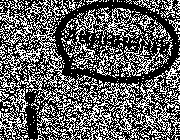

In [15]:
cv2_imshow(image)

It feels like we get something! But the image is really noisy though. Let's try to improve our classifier to get a clearer image

# Improving the classification

## Our baseline

In [16]:
# We d like to improve the baseline that we built above
# We have no information on the proportion of labels in the test set (it migth not be the same as the train set). Since we want to reveal an image, using the metric Accuracy seems ok here.

# Reminder: our naive classifier:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)

# Let's get the Accuracy score of our naive classifier by cross validating it on the training set.
cross_val_score(rf_model, train_df[features], train_df['target_binary'])

array([0.86983204, 0.86014212, 0.86724806, 0.85271318, 0.84722222])

In [ ]:
# Our baseline is ~85%

## Having a look at the dataset


In [17]:
fig = px.histogram(train_df, x="MedInc", color="target_binary", marginal="rug")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

In [18]:
fig = px.histogram(train_df, x="AveRooms", color="target_binary", marginal="rug")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

In [19]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']


fig = px.scatter_matrix(train_df,
    dimensions=features,
    color="target_binary")
fig.show()

## Idea1: Rebalancing the dataset

> Indented block



In [20]:
fig = px.histogram(train_df, x="target_binary")
fig.show()

In [21]:
# It seems that the dataset is imbalanced, it should help to rebalance the training set

# Resampling
new_train_df = pd.concat([train_df[train_df['target_binary']=='0'].sample(frac=0.25), train_df[train_df['target_binary']=='1']])

cross_val_score(rf_model, new_train_df[features], new_train_df['target_binary'])

array([0.79214781, 0.78582435, 0.78890601, 0.78659476, 0.7742681 ])

In [22]:
# It looks like the accuracy hasn't improved much, let's have a look at the image
rf_model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
rf_model.fit(new_train_df[features], new_train_df['target_binary'])

to_predict_df['target_binary'] = rf_model.predict(to_predict_df[features])

image = transform_rows_values_to_2d_array(n_rows, n_cols, to_predict_df, 'target_binary')*255

<ipython-input-22-aef4ea7ae05f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



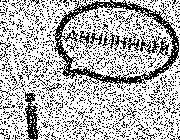

In [23]:
cv2_imshow(image)

In [ ]:
# The image seems better now

## Idea2: Tuning hyperparameters


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(n_estimators=10)
param_grid = {
   'n_estimators': [50,100,150,200],
   'max_depth': [2, 3, 4, 5, 6, 8]}
search = GridSearchCV(rf_model, param_grid, cv=5)
search.fit(new_train_df[features], new_train_df['target_binary'])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random

In [ ]:
search.cv_results_

{'mean_fit_time': array([0.16965566, 0.3211833 , 0.48095207, 0.64289145, 0.20092707,
        0.39518223, 0.60120478, 0.78012748, 0.23318362, 0.46765056,
        0.69389205, 0.94570155, 0.27486019, 0.54137011, 0.79226336,
        1.04123149, 0.29853983, 0.59788222, 0.89156833, 1.18208914,
        0.35244184, 0.697191  , 1.08656578, 1.43071399]),
 'mean_score_time': array([0.01022472, 0.01701427, 0.02701139, 0.03084054, 0.01054115,
        0.0182025 , 0.02424989, 0.03236246, 0.0122015 , 0.01936088,
        0.0283555 , 0.0348083 , 0.01241546, 0.02071276, 0.0289968 ,
        0.03731861, 0.01239152, 0.02238503, 0.0293694 , 0.03774219,
        0.01341543, 0.02349691, 0.03562407, 0.04558687]),
 'mean_test_score': array([0.81635951, 0.8077318 , 0.80603771, 0.8098892 , 0.83838819,
        0.84208524, 0.83654014, 0.83854215, 0.84901815, 0.85009673,
        0.85086667, 0.85209981, 0.85656728, 0.86057285, 0.85903249,
        0.85718278, 0.86411629, 0.8616519 , 0.86627333, 0.86303747,
        0.870

## Idea 3: Some feature engineering

Looking at the features names, you can make out thatthey represent housing data. We don't know what the target is, but we might guess that looking at eg: 'Average ratio of bedrooms to rooms' is interesting. Let's see if it adds any value to our prediction.

In [ ]:
train_df['RatioBedroomsToTotalRooms'] = train_df['AveBedrms'] / train_df['AveRooms']
train_df['RatioOccupToBedrooms'] = train_df['AveOccup'] / train_df['AveBedrms']
train_df['RatioOccupToRooms'] = train_df['AveOccup'] / train_df['AveRooms']

# This one is trickier, but if you look at the actual map created by these data points, it looks like California. getting LongPlusLat gives a good feature to separate houses close to the ocean from the others.
train_df['LongPlusLat'] = train_df['Longitude'] + train_df['Latitude']


rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)
cross_val_score(rf_model, train_df[features+['RatioBedroomsToTotalRooms', 'RatioOccupToBedrooms', 'RatioOccupToRooms', 'LongPlusLat']], train_df['target_binary'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

array([0.89890181, 0.90083979, 0.89922481, 0.89147287, 0.87596899])

In [ ]:
# We improved our accuracy by at least 2%!


## Other ideas that we didn't try here

- Try other types of ML models
- Create different models and average all the results together (will probably reduce noise)

# Our final Model

In [ ]:
# Feature Engineering
def add_features(df):
  df['RatioBedroomsToTotalRooms'] = df['AveBedrms'] / df['AveRooms']
  df['RatioOccupToBedrooms'] = df['AveOccup'] / df['AveBedrms']
  df['RatioOccupToRooms'] = df['AveOccup'] / df['AveRooms']
  df['LongPlusLat'] = df['Longitude'] + df['Latitude']

  return df

train_df = add_features(train_df)

new_features = features + ['RatioBedroomsToTotalRooms', 'RatioOccupToBedrooms', 'RatioOccupToRooms', 'LongPlusLat']

# Model initialisation with our chosen hyperparameters
rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)

# Dataset rebalancing
new_train_df = pd.concat([train_df[train_df['target_binary']=='0'].sample(frac=0.25), train_df[train_df['target_binary']=='1']])

# train
rf_model.fit(new_train_df[new_features], new_train_df['target_binary'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

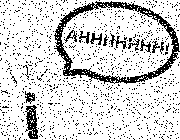

In [ ]:
# Apply new feature to to_predict table and Predict labels
to_predict_df = add_features(to_predict_df)

to_predict_df['target_binary'] = rf_model.predict(to_predict_df[new_features])

# Extract image
image = transform_rows_values_to_2d_array(n_rows, n_cols, to_predict_df, 'target_binary')*255

# Display
cv2_imshow(image)

## Denoise the final image

In [ ]:
# Let's use simple heuristics
# a pixel has 8 neighbours. If >6 of them are black -> turn the pixel to black. If >6 are white -> make it white

for row in range(1, len(image)-1):
  for col in range(1, len(image[0])-1):
    n_black_neighbours = len(
        list(filter(
            lambda x:x==0,
            [image[row-1, col-1], image[row, col-1], image[row+1, col-1], image[row-1, col],image[row+1, col], image[row-1, col+1], image[row, col+1], image[row+1, col+1]]
            ))
        )
    n_white_neighbours = len(
        list(filter(
            lambda x:x==255,
            [image[row-1, col-1], image[row, col-1], image[row+1, col-1], image[row-1, col],image[row+1, col], image[row-1, col+1], image[row, col+1], image[row+1, col+1]]
            ))
        )

    if n_black_neighbours > 6:
      image[row,col]=0

    if n_white_neighbours > 6:
      image[row,col]=255


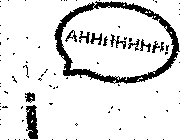

In [ ]:

cv2_imshow(image)

In [ ]:
# Not perfect, but pretty good!

In [ ]:
# The picture represents the letter 'i' that 'screams'. In short: 'i screams' = 'ice creams'
